In [18]:
from data.data_pipe import de_preprocess, get_train_loader, get_val_data 
import cv2 
from config import get_config
import numpy as np 
import torch
from matplotlib import pyplot as plt 
%matplotlib inline 


In [2]:
conf = get_config()
loader, class_num = get_train_loader(conf)  

In [11]:
images, labels = next(iter(loader))

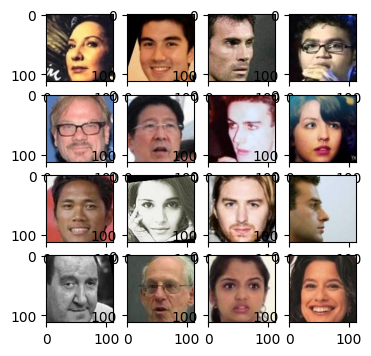

In [17]:
fig = plt.figure(figsize=(4,4))
for i in range(16):
    img = images[i]
    img = torch.permute(img,(1,2,0)).numpy()
    img = (img-img.min())/(img.max()-img.min())
    img = np.uint8(img*255)
    fig.add_subplot(4, 4, i+1)
    plt.imshow(img)

In [40]:
import bcolz 
import pickle
import os 
import mxnet as mx
from PIL import Image 
path = "/mnt/DD5/FaceVerification/faces_emore/calfw.bin"
image_size = (112,112)
rootdir = "temp/calfw"
if not os.path.exists(rootdir):
    os.makedirs(rootdir)
bins, issame_list = pickle.load(open(path, 'rb'), encoding='bytes')
data = bcolz.fill([len(bins), 3, image_size[0], image_size[1]], dtype=np.float32, rootdir=rootdir, mode='w')
for i in range(len(bins)):
    _bin = bins[i]
    img = mx.image.imdecode(_bin).asnumpy()
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    # cv2.imwrite()
    img = img.transpose((2,0,1))
    # img = Image.fromarray(img.astype(np.uint8))
    data[i, ...] = img
    i += 1
    if i % 1000 == 0:
        print('loading bin', i)
print(data.shape)
np.save(str(rootdir)+'_list', np.array(issame_list))


loading bin 1000
loading bin 2000
loading bin 3000
loading bin 4000
loading bin 5000
loading bin 6000
loading bin 7000
loading bin 8000
loading bin 9000
loading bin 10000
loading bin 11000
loading bin 12000
(12000, 3, 112, 112)


In [42]:

carray = bcolz.carray(rootdir = '/home/altex/Codes/FaceRecognition_Detection/InsightFace_Pytorch/temp/calfw', mode='r')
issame = np.load('/home/altex/Codes/FaceRecognition_Detection/InsightFace_Pytorch/temp/calfw_list.npy')

In [43]:
carray.shape

(12000, 3, 112, 112)

In [45]:
issame.shape

(6000,)

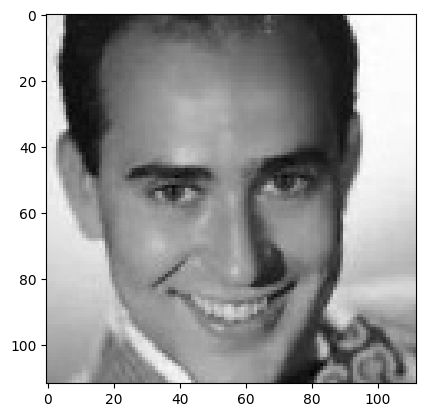

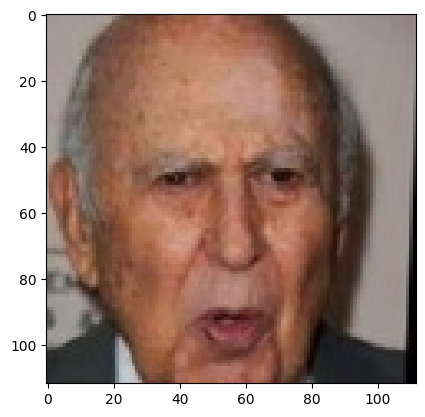

In [32]:
for i in range(2):
    _bin = bins[i]
    img = mx.image.imdecode(_bin).asnumpy()
    plt.imshow(img)
    plt.show()

In [29]:
img.shape

(112, 112, 3)